<a href="https://colab.research.google.com/github/Kamaljit12/Brain-tumor-Prediction-CNN/blob/main/brainTumorFinalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
## load this image datasets
import tensorflow as tf

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# download datasets
!kaggle datasets download -d 'masoudnickparvar/brain-tumor-mri-dataset'

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 99% 147M/149M [00:07<00:00, 23.8MB/s]
100% 149M/149M [00:07<00:00, 20.5MB/s]


In [6]:
## unzip
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-tumor-mri-dataset.zip', 'r')
zip_ref.extractall('/content/data')
zip_ref.close()

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory('/content/data/Training',
                                                       image_size=(256, 256))

val_ds = tf.keras.utils.image_dataset_from_directory('/content/data/Testing',
                                                     image_size=(256, 256))

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [8]:
labels = train_ds.class_names
print(labels)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [9]:
labels = []
for image, label in train_ds.as_numpy_iterator():
  labels.append(label)

In [10]:
ls = []
for i in labels:
  for j in i:
    ls.append(j)

In [11]:
import numpy as np
import pandas as pd

arr = np.array(ls)
pd.DataFrame(arr).value_counts()

## there is no imballencing

,count
0,
2,1595
3,1457
1,1339
0,1321


In [12]:
train_ds.as_numpy_iterator().next()[0].shape

(32, 256, 256, 3)

In [13]:
num_of_class = len(np.unique(train_ds.as_numpy_iterator().next()[1]))

In [14]:
from tensorflow import keras
## trian the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [51]:
## trian the model

model = Sequential([
    Conv2D(64, kernel_size=(3,3), strides=2, activation='relu', padding='valid',input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(128, (3,3), strides=2, padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(256, (3,3), strides=2, padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),


    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(num_of_class, activation='softmax', kernel_initializer="glorot_uniform")

])

In [ ]:
# ## trian the model
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# model = Sequential([
#     Conv2D(32, kernel_size=(3,3), strides=2, activation='relu', padding='valid',input_shape=(256, 256, 3)),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.4),

#     Conv2D(64, (3,3), strides=2, padding='valid',activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.4),

#     Conv2D(128, (3,3), strides=2, padding='valid',activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.4),

#     Flatten(),
#     Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
#     Dropout(0.4),
#     Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
#     Dropout(0.4),
#     Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
#     Dropout(0.4),
#     Dense(num_of_class, activation='softmax', kernel_initializer="glorot_uniform")

# ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_100 (Conv2D)                  │ (None, 127, 127, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_100              │ (None, 127, 127, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_100 (MaxPooling2D)     │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_162 (Dropout)                │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_101 (Conv2D)                  │ (None, 31, 31, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_101              │ (None, 31, 31, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_101 (MaxPooling2D)     │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_163 (Dropout)                │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_102 (Conv2D)                  │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_102              │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_102 (MaxPooling2D)     │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_164 (Dropout)                │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_165 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_166 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_167 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 32)                  │           2,0

 Total params: 1,006,052 (3.84 MB)

 Trainable params: 1,005,156 (3.83 MB)

 Non-trainable params: 896 (3.50 KB)

In [53]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [54]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("BtrainTumorCNNModel.keras", save_best_only=True)

In [56]:
earlystoping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [57]:
## fit and train the model
history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[earlystoping_cb])

Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 123ms/step - accuracy: 0.3314 - loss: 2.4567 - val_accuracy: 0.4706 - val_loss: 1.9467
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.5747 - loss: 1.7360 - val_accuracy: 0.6438 - val_loss: 1.5393
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.6480 - loss: 1.5066 - val_accuracy: 0.6766 - val_loss: 1.3171
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.7143 - loss: 1.3100 - val_accuracy: 0.7551 - val_loss: 1.1184
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.7171 - loss: 1.2324 - val_accuracy: 0.7704 - val_loss: 1.0451
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.7453 - loss: 1.1149 - val_accuracy: 0.7986 - val_loss: 0.9285
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7991 - loss: 0.9642 - val_accuracy: 0.8009 - val_loss: 0.8757
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.8045 - loss: 0.9212 -

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

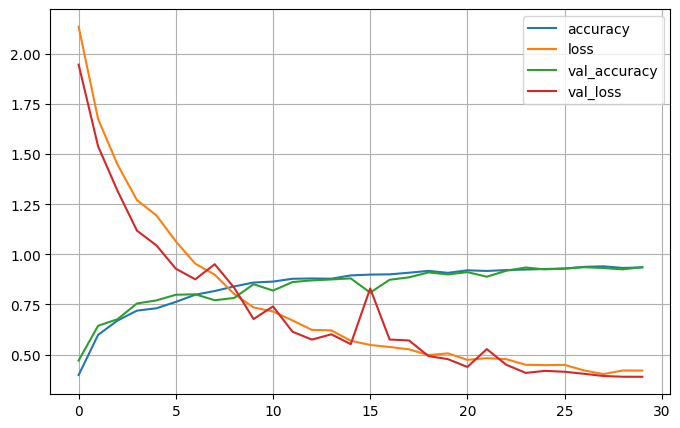

In [59]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

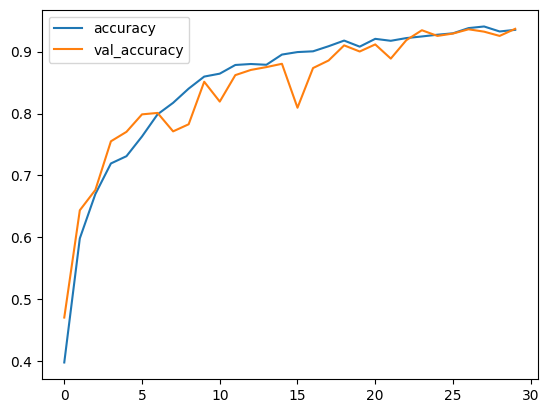

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

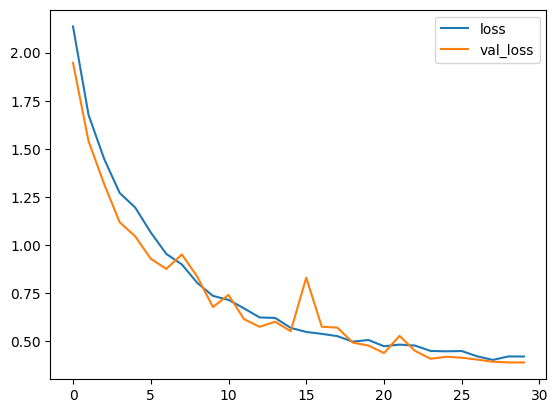

In [61]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [62]:
## test the model
test_ds = tf.keras.utils.image_dataset_from_directory('/content/data/Testing',
                                                       image_size=(256, 256))

Found 1311 files belonging to 4 classes.


In [63]:
batch = test_ds.as_numpy_iterator().next()

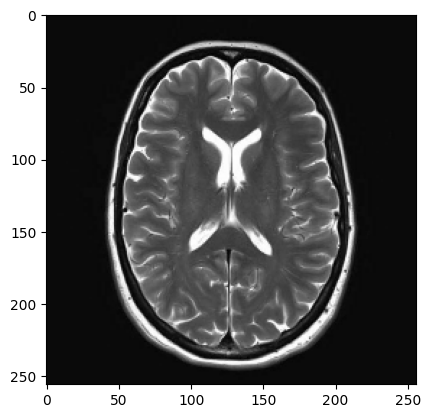

In [64]:
img = batch[0][1]
img_label = batch[1][1]
plt.imshow(img.astype(int))
plt.show()

In [65]:
image = tf.image.resize(img, (256, 256))
image = tf.expand_dims(image, 0)

In [66]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

In [67]:
prediction = model.predict(image)
index = np.argmax(prediction)
print(f"Predicted: {labels[index]}")
print(f"Actual: {labels[img_label]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
Predicted: notumor
Actual: notumor


In [69]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
model.save(f'/content/drive/MyDrive/BrainTumorNew/brainTumorMRIClassificationModel.keras')

In [71]:
loss, accu = model.evaluate(test_ds)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9221 - loss: 0.4116


In [75]:
print(f"Accuracy:{accu:.2f}%")

Accuracy:0.94%
